# Week 08: Interpreting Linear Regression

In [1]:
# get the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

advertising = pd.read_csv('Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# get info
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    advertising.drop('sales', axis=1), 
    advertising['sales'], 
    test_size=0.25, 
    random_state=42)

In [4]:
# describe
X_train.describe()

,TV,radio,newspaper
count,150.000000,150.000000,150.000000
mean,152.958000,23.497333,30.458000
std,85.098614,14.906298,20.731383
min,0.700000,0.000000,0.300000
25%,86.350000,10.225000,12.650000
50%,164.000000,22.000000,25.900000
75%,220.325000,37.425000,45.550000
max,296.400000,49.600000,100.900000


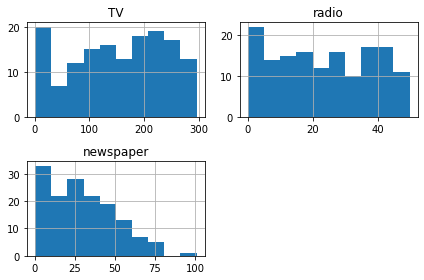

In [5]:
# histograms (univariate distribution)
import matplotlib.pyplot as plt

X_train.hist()
plt.tight_layout();

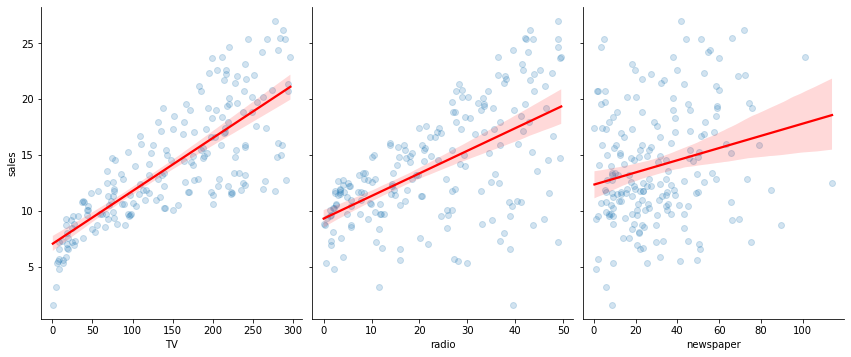

In [6]:
# scatter plots with y
import seaborn as sns

sns.pairplot(advertising, x_vars=['TV','radio','newspaper'], y_vars='sales', 
             kind='reg', 
             height=5,
             aspect=0.8, 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}});

In [7]:
# create and train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
yhat = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')

MSE: 2.880023730094192
R-Squared: 0.8935163320163658


In [8]:
# make prediction
d = {'TV': 232.1, 'radio': 8.6, 'newspaper': 8.7}
d = pd.Series(d)
model.predict(pd.DataFrame([d]))

array([14.99230101])

In [9]:
# view the coefficients and intercept
print(list(zip(X_train, model.coef_)))
print(model.intercept_)

[('TV', 0.045433558624649886), ('radio', 0.19145653561741383), ('newspaper', 0.002568090815700606)]
2.778303460245283


**Model.fit()**: How the model learns, trains, from the provided data to get the coefficients

**R-Squared**: The R-squared value of 90% shows that our model features have a large positive linear relationship with the outcome variable

**Interpreting a coefficient**: \\$1000 dollars on radio advertising would be associated with an increase of sales by 0.19 * 1000, or 190 units, given radio and newspaper spending stays the same.

In [10]:
# add constant and build model
import statsmodels.api as sm

# X_train = sm.add_constant(X_train)
X_train.insert(0, 'const', 1) # don't forget about X_test; this is just for demo
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     422.2
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.02e-71
Time:                        09:59:21   Log-Likelihood:                -289.20
No. Observations:                 150   AIC:                             586.4
Df Residuals:                     146   BIC:                             598.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7783      0.375      7.415      0.000       2.038       3.519
TV             0.0454      0.002     27.960      0.000       0.042       0.049
radio          0.1915      0.010     19.076      0.000       0.172       0.211
newspaper      0.0026      0.007      0.356      0.722      -0.012       0.017
==============================================================================
Omnibus:                       61.891   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.420
Skew:                          -1.581   Prob(JB):                     1.50e-45
Kurtosis:                       7.799   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# drop newspaper
model = sm.OLS(y_train, X_train.drop('newspaper', axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     637.0
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           3.81e-73
Time:                        09:59:40   Log-Likelihood:                -289.26
No. Observations:                 150   AIC:                             584.5
Df Residuals:                     147   BIC:                             593.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8245      0.350      8.059      0.000       2.132       3.517
TV             0.0454      0.002     28.043      0.000       0.042       0.049
radio          0.1928      0.009     20.848      0.000       0.175       0.211
==============================================================================
Omnibus:                       62.721   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.914
Skew:                          -1.592   Prob(JB):                     2.15e-47
Kurtosis:                       7.924   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# view the coefficients and intercept
print(model.params)

const    2.824519
TV       0.045433
radio    0.192821
dtype: float64


If we want to see an increase of 22 units in sales, given a unit is one million dollars, and we are spending \\$37,800 on radio advertising, how much would we need to spend on TV advertising? Note: our sales has been scaled to match units of TV and radio spending, given TV and radio units are $1000 each.

Consider this equation:

$
y = \beta_0 + \beta_1(X_1) + \beta_2(X_2)
$

To see an increase of 20 units in sales knowing that we are spending \\$37,800 on radio advertising, what do we need to spend on TV?

In [13]:
# solve for X1
intercept = model.params['const']
B1 = model.params['TV']
B2 = model.params['radio']
X2 = 37.8
print(f'y = {intercept:0.2f} +( {B1:0.2f} * X1) + ({B2:0.2f} * {X2})')

y = 2.82 +( 0.05 * X1) + (0.19 * 37.8)
